### 결정트리 알고리즘 기반 모델
- 데이터셋의 피쳐(특성)을 기준으로 데이터를 분류하는 알고리즘
- 질문방식으로 Yes/No 결과에 따라 데이터셋 분리가 됨.
- 장점 : 스케일링이나 정규화 불필요 ==> 성능에 영향이 없음. 쉬운 알고리즘
- 단점 : 과대적합 ===> 해결을 위한 많은 하이퍼 파라미터 존재!
- 다른 ML 알고리즘에 비해 성능이 좋지 않음 ==> 단, 여러개의 DT가 모이면 성능이 강해짐.
    - 앙상블에 주로 사용됨!

[1] 모듈 로딩 및 데이터 준비

In [109]:
# 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [110]:
# 데이터 로딩
featureDF, targetSR = load_iris(as_frame=True, return_X_y=True)

print(f'featureDF : {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR : {targetSR.shape}, {targetSR.ndim}D')

featureDF : (150, 4), 2D
targetSR : (150,), 1D


[2] 학습용 데이터셋 준비

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [112]:
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=10,
                                                    stratify=targetSR)

In [113]:
print(f'x_train : {x_train.shape}, {x_train.ndim}D')
print(f'x_test : {x_test.shape}, {x_test.ndim}D')

print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

x_train : (112, 4), 2D
x_test : (38, 4), 2D
y_train : (112,), 1D
y_test : (38,), 1D


[3] 기본학습

In [114]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [115]:
# 모델 파라미터 : 학습 fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'[dt_model.classes_]: {dt_model.classes_}')
print(f'[dt_model.n_classes_]: {dt_model.n_classes_}')
print(f'[dt_model.max_features_]: {dt_model.max_features_}')
print(f'[dt_model.feature_importances_]: {dt_model.feature_importances_}')
print(f'[dt_model.feature_names_in_]: {dt_model.feature_names_in_}')

[dt_model.classes_]: [0 1 2]
[dt_model.n_classes_]: 3
[dt_model.max_features_]: 4
[dt_model.feature_importances_]: [0.03125249 0.         0.06844775 0.90029976]
[dt_model.feature_names_in_]: ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']


- 성능 체크

In [116]:
# 학습용 데이터셋에 대한 성능
train_score = dt_model.score(x_train, y_train)

# 테스트용 데이터셋에 대한 성능
test_score = dt_model.score(x_test, y_test)

In [117]:
print(f'train_score : test_score = {train_score} : {test_score}')

train_score : test_score = 1.0 : 1.0


[4] 교차 검증 => 데이터셋 부족 해결 및 과대적합을 회피

In [118]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [119]:
# 교차검증 준비 ==> 모델 인스턴스, trainDS, cv=5[기본]
dt_model2 = DecisionTreeClassifier(random_state=1)
result=cross_validate(dt_model2, x_train, y_train,
               return_train_score=True,
               return_estimator=True)

In [120]:
# dict => DataFrame
resultDF = pd.DataFrame(result)
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.0,0.000000,DecisionTreeClassifier(random_state=1),0.956522,1.0
1,0.0,0.014829,DecisionTreeClassifier(random_state=1),0.956522,1.0
2,0.0,0.000000,DecisionTreeClassifier(random_state=1),0.954545,1.0
3,0.0,0.000000,DecisionTreeClassifier(random_state=1),0.863636,1.0
4,0.0,0.000000,DecisionTreeClassifier(random_state=1),0.909091,1.0


[5] 성능 향상 위한 튜닝 ==> 하이퍼 파라미터 설정
- 단점 : 과대적합
    * max_depth, min_samples_leaf, ...... ==> 多多

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
# 하이퍼파라미터 dict 생성
params = {'max_depth':[4,3,2,1],
          'min_samples_leaf':[5,3,2]}

In [123]:
dtcv = GridSearchCV(DecisionTreeClassifier(), param_grid=params, refit=True)
dtcv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]})

In [124]:
# 모델 파라미터 확인

print(f'[dtcv.best_params_]: {dtcv.best_params_}')
print(f'[dtcv.best_score_]: {dtcv.best_score_}')
print(f'[dtcv.best_estimator_]: {dtcv.best_estimator_}')
# print(f'[dtcv.cv_results_]: {dtcv.cv_results_}')

[dtcv.best_params_]: {'max_depth': 4, 'min_samples_leaf': 2}
[dtcv.best_score_]: 0.9371541501976285
[dtcv.best_estimator_]: DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)


In [125]:
cv_resultDF = pd.DataFrame(dtcv.cv_results_)
cv_resultDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000865,0.001290,0.003920,0.003272,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,0.863636,0.954545,0.928458,0.036299,2
1,0.001995,0.002035,0.001091,0.000647,4,3,"{'max_depth': 4, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,0.909091,0.909091,0.928458,0.022163,2
2,0.000787,0.000964,0.002793,0.005097,4,2,"{'max_depth': 4, 'min_samples_leaf': 2}",0.956522,0.956522,0.954545,0.909091,0.909091,0.937154,0.022925,1
3,0.003371,0.005762,0.000752,0.000930,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,0.863636,0.954545,0.928458,0.036299,2
4,0.001812,0.000417,0.001135,0.000226,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,0.863636,0.909091,0.919368,0.034262,8
5,0.001043,0.000025,0.001327,0.000385,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.913043,0.956522,0.954545,0.863636,0.909091,0.919368,0.034262,8
6,0.001521,0.000544,0.000691,0.000389,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,0.909091,0.909091,0.928458,0.022163,2
7,0.001324,0.000402,0.001121,0.000485,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,0.909091,0.909091,0.928458,0.022163,2
8,0.001876,0.000438,0.001405,0.000484,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.913043,0.956522,0.954545,0.909091,0.909091,0.928458,0.022163,2
9,0.000860,0.001058,0.000288,0.000576,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.652174,0.652174,0.681818,0.636364,0.636364,0.651779,0.016601,10


In [126]:
cv_resultDF.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

- 주요 피쳐 시각화

In [127]:
# 가장 좋은 모델
best_model = dtcv.best_estimator_
print(f'[best_model.max_depth]: {best_model.max_depth}')
print(f'[best_model.min_samples_leaf]: {best_model.min_samples_leaf}')

[best_model.max_depth]: 4
[best_model.min_samples_leaf]: 2


In [128]:
# 피쳐 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_

(array([0.01321873, 0.        , 0.07164651, 0.91513476]), 4)

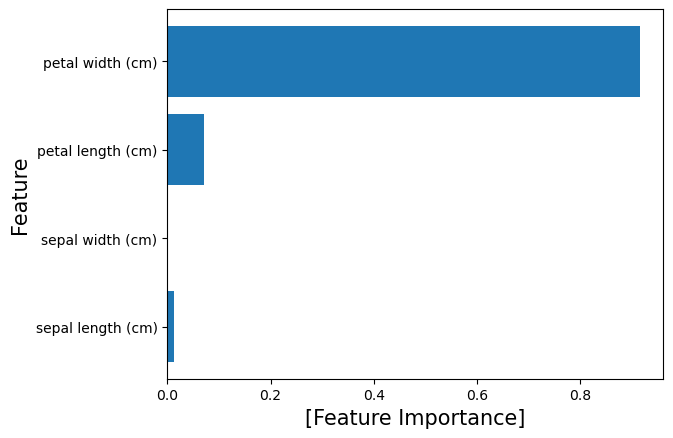

In [129]:
import matplotlib.pyplot as plt

plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('[Feature Importance]', size=15)
plt.ylabel('Feature', size=15)
plt.show()

- DT 그래프 시각화
    * Graphviz 프로그램 (OS에 맞는 버전) 설치 + python용 패키지 graphviz 설치

In [130]:
## [1] DT모델을 dot포맷의 파일로 저장 ==> export_graphviz()

from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='tree.dot',
                class_names=['setosa','versicolor','virginica'],
                feature_names=best_model.feature_names_in_,
                impurity=True,
                filled=True,
                rounded=True,)
                # precision=2
                # rotate=True)


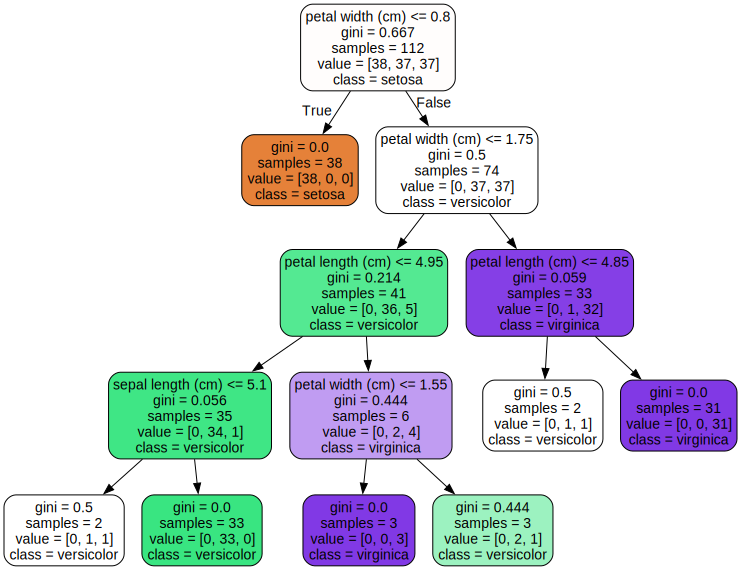

In [131]:
## [2] dot파일 출력
import graphviz

# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

[6] 새로운 데이터 예측

In [132]:
new_data = featureDF.iloc[:1]+0.21
new_data.shape

(1, 4)

In [133]:
best_model.predict(new_data)

array([0])

In [134]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])

#### 앙상블(ENSEMBLE) - Voting 방식
- 여러개의 모델 또는 동일 모델과 샘플링 데이터셋으로 병렬학습 진행하는 방식
- Voting 방식/기법
    - 구성 : 동일 데이터셋 + 학습 알고리즘이 다른 모델
    - 결과도출 : Hard(직접), Soft(간접)

- 유방암 판별 모델 구현 ==> 피쳐: 30개, 라벨: 2개 (이진분류)

[1] 데이터 준비

In [135]:
# 모듈 로딩
from sklearn.datasets import load_breast_cancer

In [136]:
# 데이터 로딩
dataSet = load_breast_cancer(as_frame=True)
print(dataSet.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [137]:
# 데이터 확인
print('target_names:', dataSet['target_names'])
print('feature_names:', dataSet['feature_names'])
print('DESCR:', dataSet['DESCR'])


target_names: ['malignant' 'benign']
feature_names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
DESCR: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standa

In [138]:
featureDF2 = dataSet['data']
targetSR2 = dataSet['target']

In [139]:
featureDF2.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


[2] 학습용 데이터셋 준비

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(featureDF2,
                                                        targetSR2,
                                                        stratify=targetSR2,
                                                        random_state=10)

In [142]:
type(x_train2), type(x_train2.values)

(pandas.core.frame.DataFrame, numpy.ndarray)

[3] 학습 진행 ==> 앙상블의 보팅 방식 진행
- 데이터셋 동일
- 알고리즘 모델 : KNeighborsClassifier, LogisticRegression, DecisionTreeClassfier

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [144]:
# 알고리즘 인스턴스 생성
k_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier(random_state=10)
lr_model = LogisticRegression(solver='liblinear')

In [154]:
# 보팅인스턴스 생성
v_model = VotingClassifier(estimators=[('k_model', k_model), ('dt_model', dt_model), ('lr_model', lr_model)],
                           voting='hard')
vs_model = VotingClassifier(estimators=[('k_model', k_model), ('dt_model', dt_model), ('lr_model', lr_model)],
                           voting='soft')

In [155]:
# 학습 진행
v_model.fit(x_train2.values, y_train2.values) # hard 즉, 직접 선거 방식
vs_model.fit(x_train2.values, y_train2.values) # soft 즉, 간접 선거 방식으로 모델마다 확률값 합계에 평균

VotingClassifier(estimators=[('k_model', KNeighborsClassifier()),
                             ('dt_model',
                              DecisionTreeClassifier(random_state=10)),
                             ('lr_model',
                              LogisticRegression(solver='liblinear'))],
                 voting='soft')

In [147]:
# 모델 파라미터 확인
print(f'[v_model.classes_] : {v_model.classes_}')
print(f'[v_model.estimators_] : {v_model.estimators_}')
print(f'[v_model.named_estimators_] : {v_model.named_estimators_}')

print(f'[v_model.n_features_in_] : {v_model.n_features_in_}')
# print(f'[v_model.feature_names_in_] : {v_model.feature_names_in_}') # fit() 할때 DataFrame 전달한 경우

[v_model.classes_] : [0 1]
[v_model.estimators_] : [KNeighborsClassifier(), DecisionTreeClassifier(random_state=10), LogisticRegression(solver='liblinear')]
[v_model.named_estimators_] : {'k_model': KNeighborsClassifier(), 'dt_model': DecisionTreeClassifier(random_state=10), 'lr_model': LogisticRegression(solver='liblinear')}
[v_model.n_features_in_] : 30


[4] 성능 확인 => trainDS과 (validation DS), 없어서 testDS

In [158]:
train_score2 = v_model.score(x_train2.values, y_train2.values)
test_score2 = v_model.score(x_test2.values, y_test2.values)

soft_train_score2 = vs_model.score(x_train2.values, y_train2.values)
soft_test_score2 = vs_model.score(x_test2.values, y_test2.values)

In [159]:
print(f'[hard voting] train_score2 : test_score2 = {train_score2} : {test_score2}')
print(f'[soft voting] soft_train_score2 : soft_test_score2 = {soft_train_score2} : {soft_test_score2}')

[hard voting] train_score2 : test_score2 = 0.9741784037558685 : 0.951048951048951
[soft voting] soft_train_score2 : soft_test_score2 = 0.9882629107981221 : 0.951048951048951


In [ ]:
##### ERROR MESSAGE : AttributeError: 'Flags' object has no attribute 'c_contiguous'
### => ndarray 타입의 데이터로 변경

In [1]:
# from sklearn.metrics import classification_report